In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
breast_cancer = pd.read_excel("breast_cancer.xlsx")

In [10]:
breast_cancer = breast_cancer.sort_index()

In [11]:
breast_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [12]:
breast_cancer.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [13]:
print(breast_cancer.shape)

(116, 10)


In [14]:
print(breast_cancer['Classification'].unique())

[1 2]


In [15]:
print(breast_cancer.groupby('Classification').size())

Classification
1    52
2    64
dtype: int64


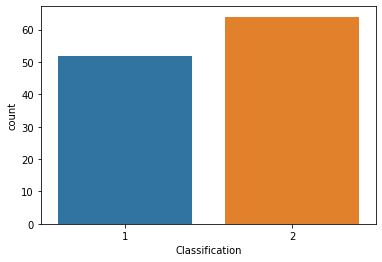

In [16]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(breast_cancer['Classification'],label="Count")
plt.show()

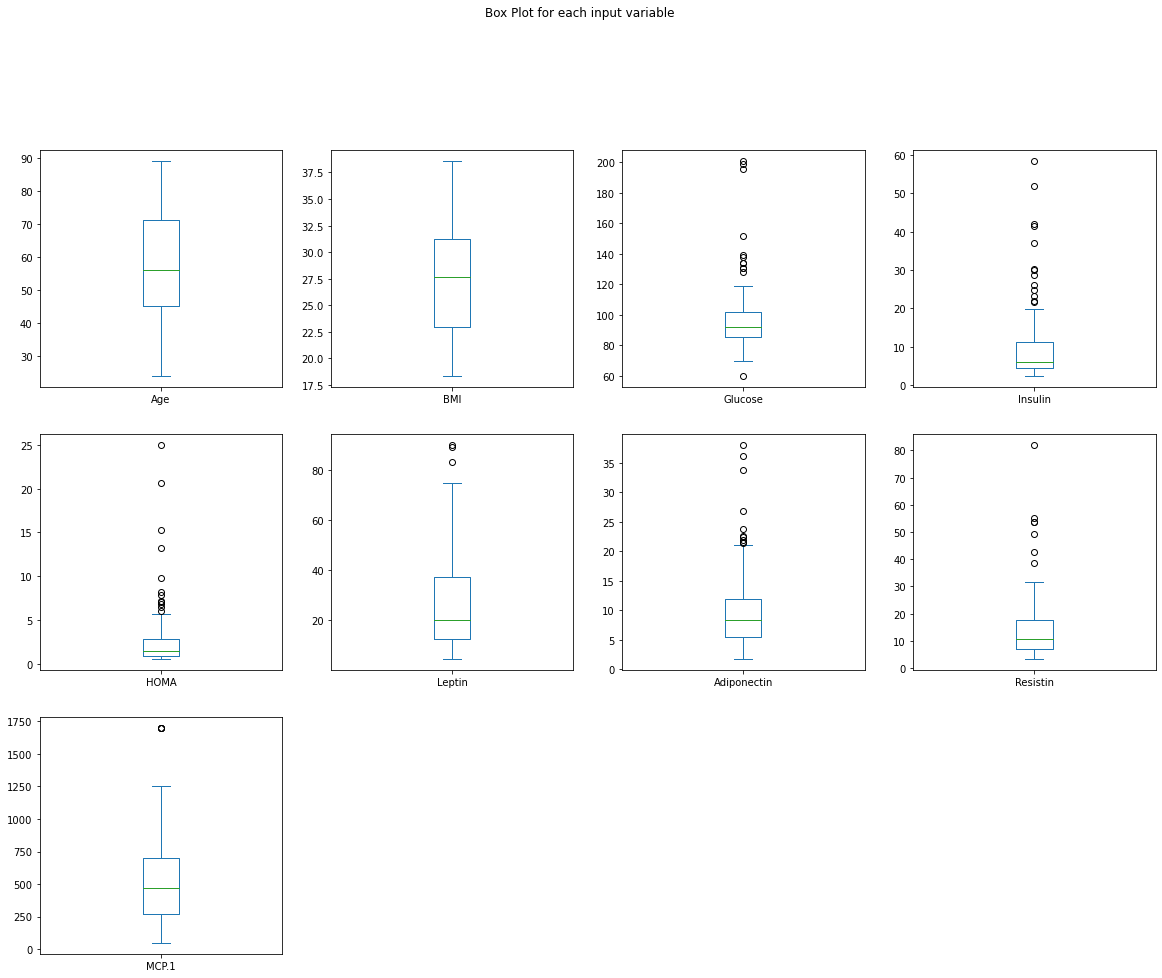

In [17]:
breast_cancer.drop('Classification', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, 
                                                  figsize=(20,20),  title='Box Plot for each input variable')
plt.savefig('class_box')
plt.show()

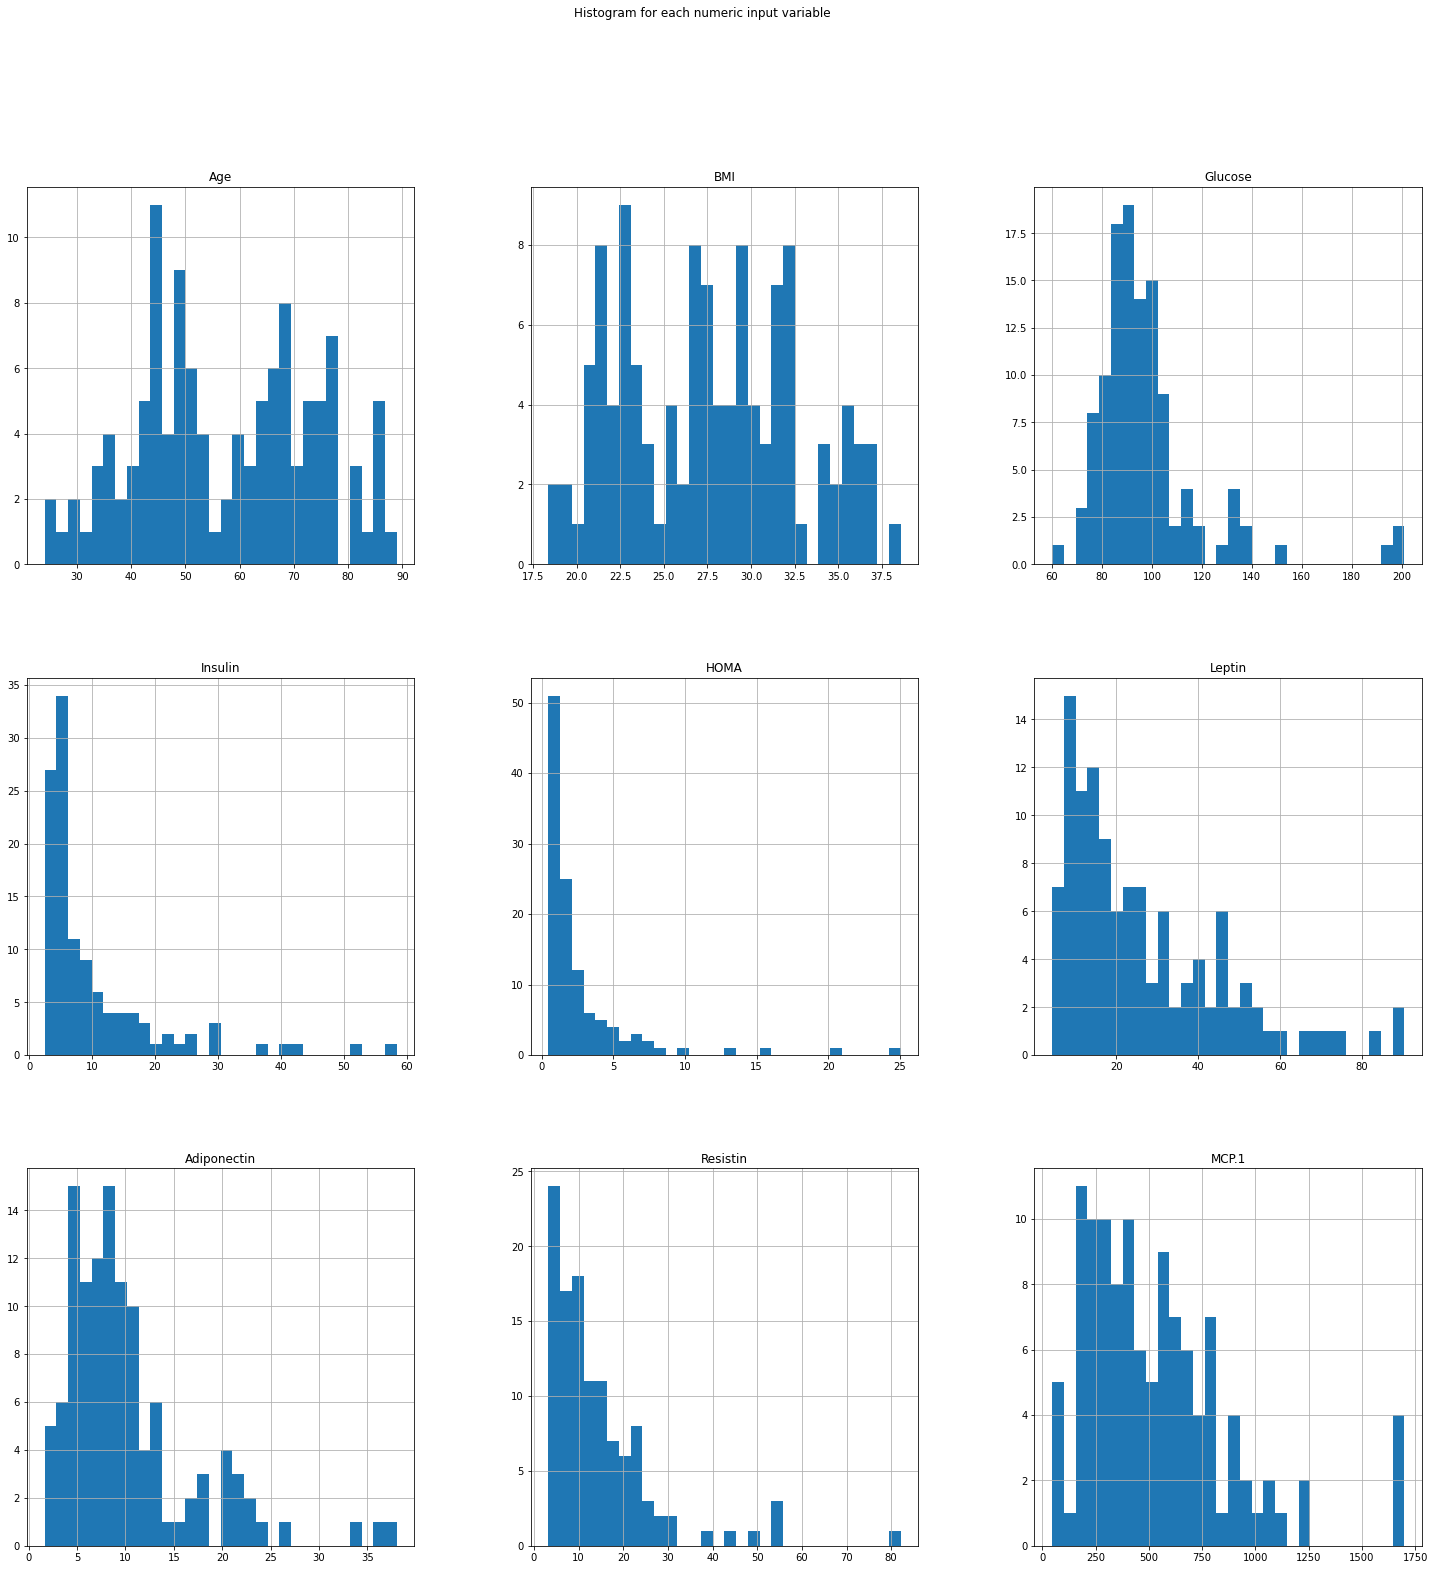

In [18]:
import pylab as pl
breast_cancer.drop('Classification' ,axis=1).hist(bins=30, figsize=(25,25))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Classification_hist')
plt.show()

In [19]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

In [20]:
feature_names = ['Age', 'BMI', 'Glucose', 'Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1','Classification']
X = breast_cancer[feature_names]
y = breast_cancer['Classification']

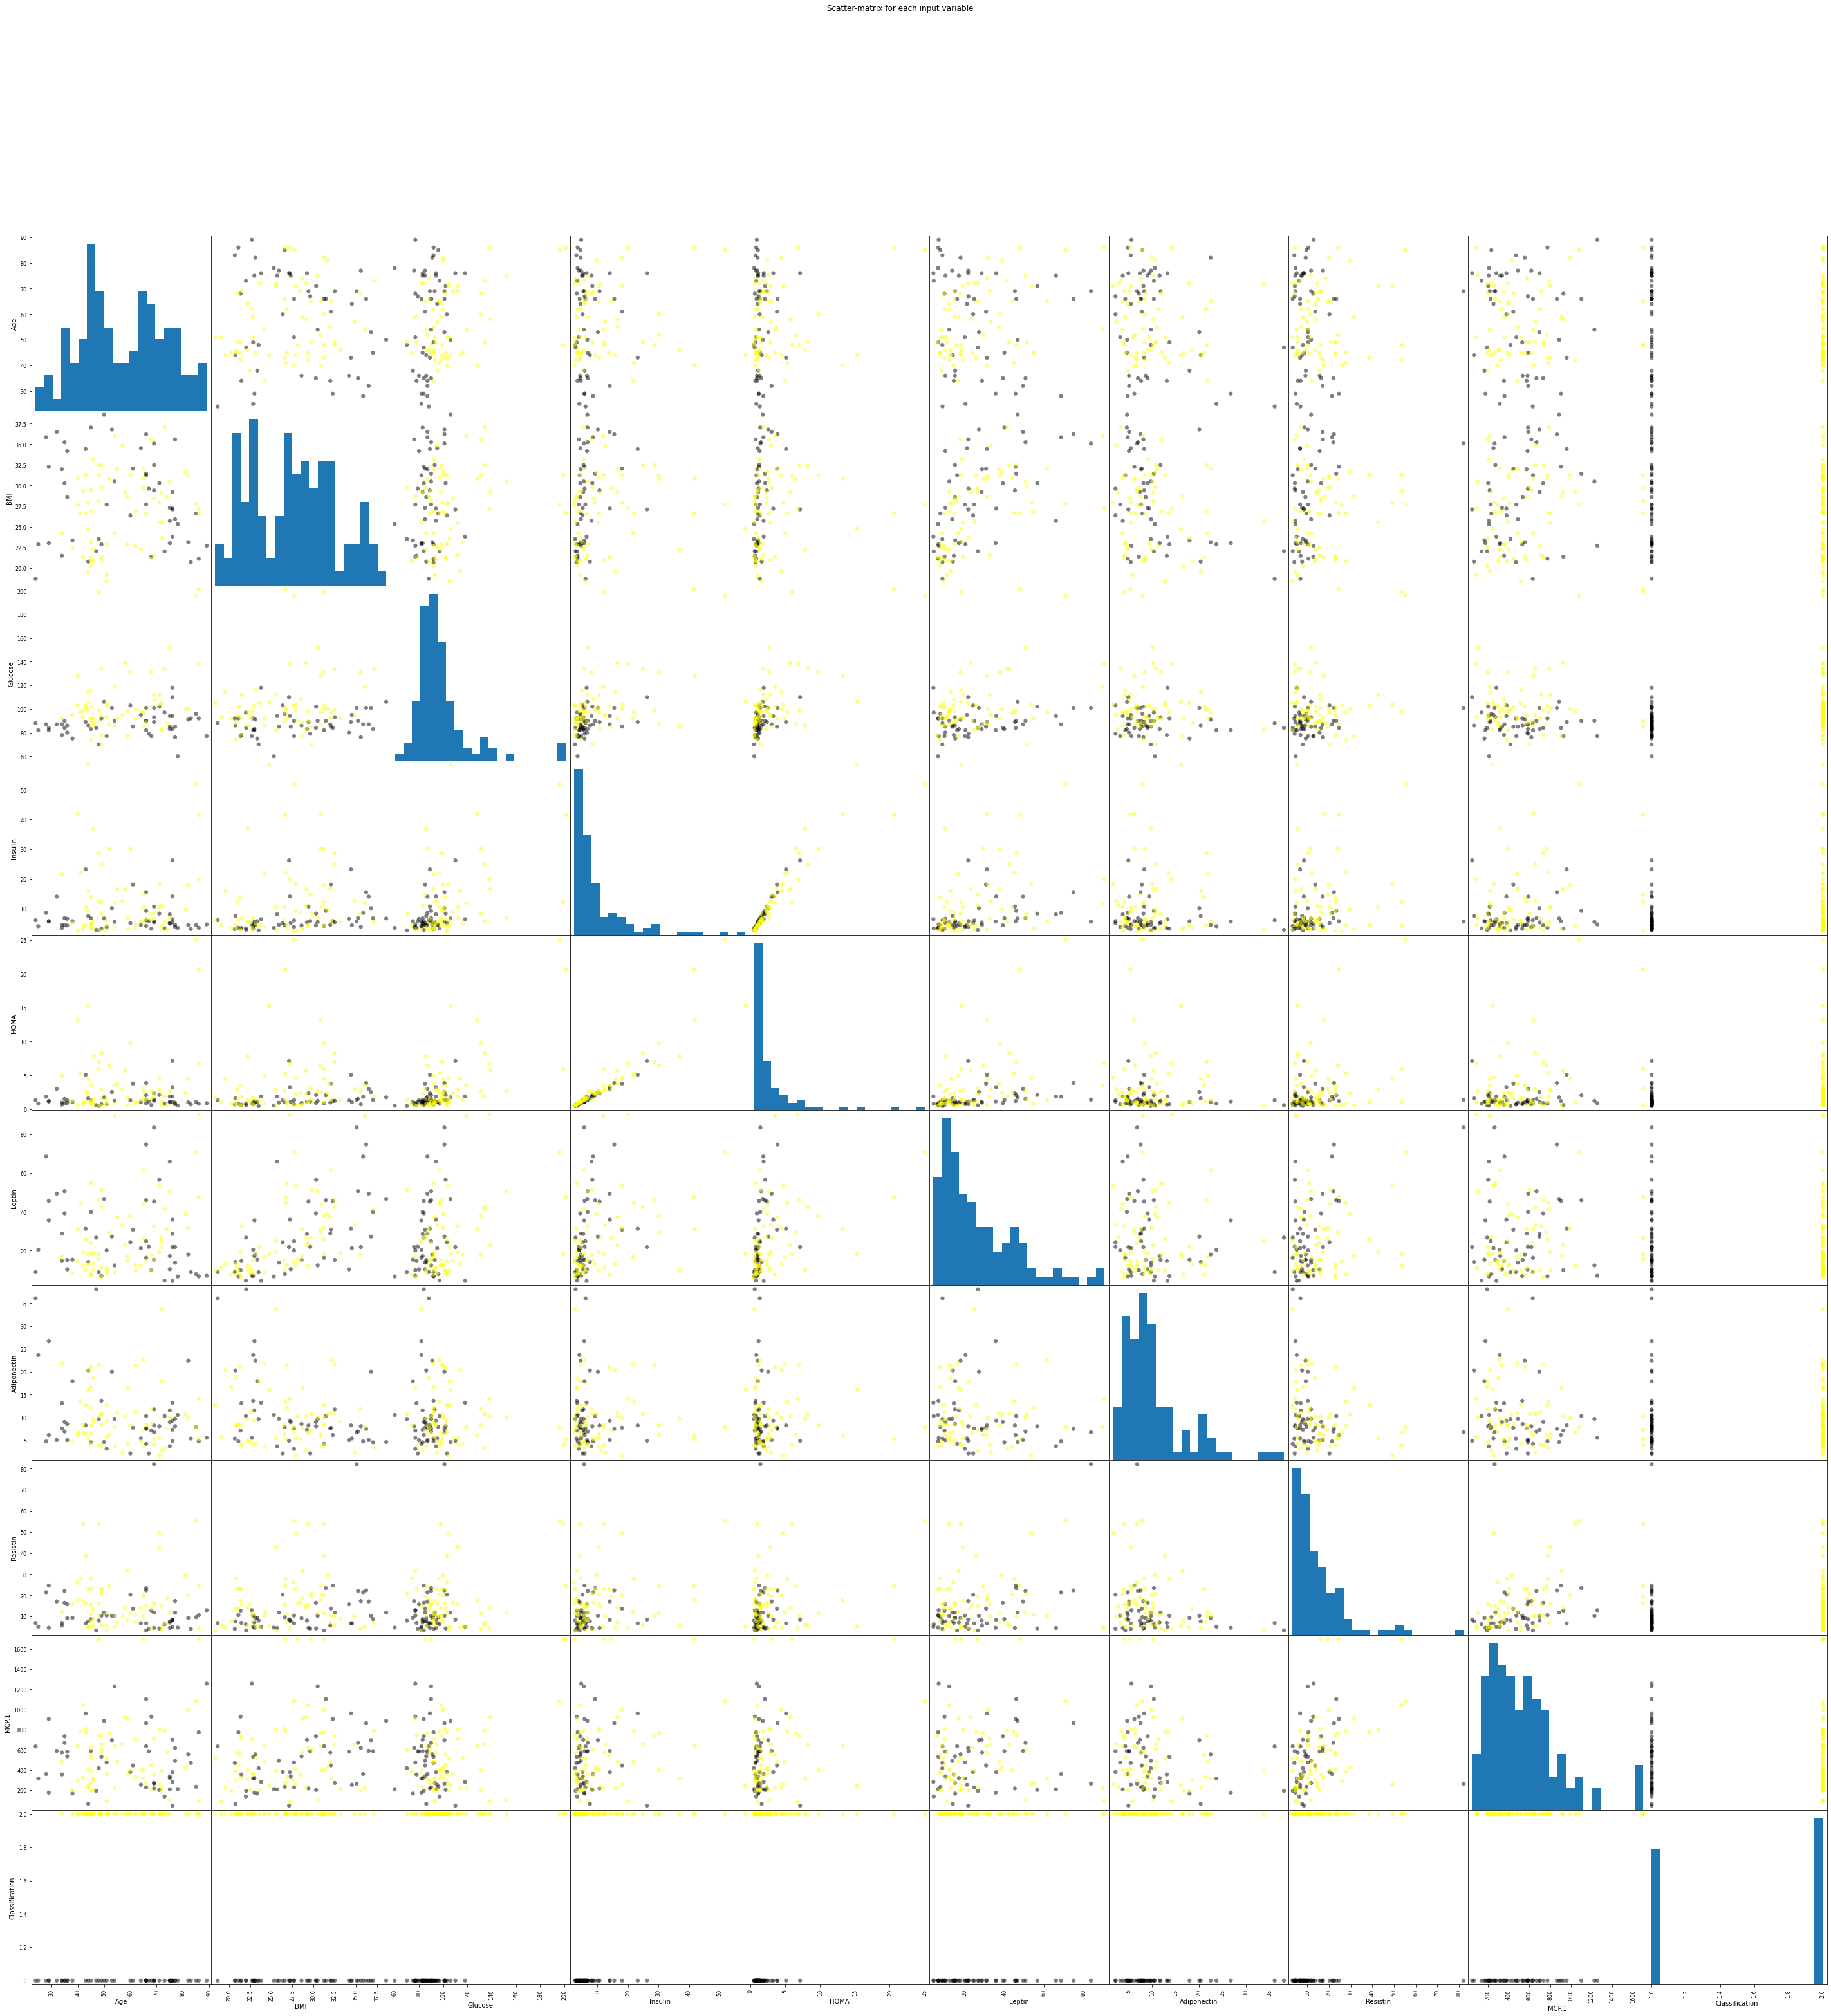

In [21]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':20}, figsize=(50,50), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('breast_cancer_scatter_matrix')

In [22]:
breast_cancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


## Firefly Algorithm

In [23]:
import numpy
import math
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold,cross_val_score
        
def alpha_new(alpha, NGen):
    #% alpha_n=alpha_0(1-delta)^NGen=10^(-4);
    #% alpha_0=0.9
    delta = 1 - (10 ** (-4) / 0.9) ** (1 / NGen)
    alpha = (1 - delta) * alpha
    return alpha


def FFA(X_train,X_test,y_train,y_test, lb, ub, dim, n, MaxGeneration):

    # General parameters

    # n=50 #number of fireflies
    # dim=30 #dim
    # lb=-50
    # ub=50
    # MaxGeneration=10

    # FFA parameters
    alpha = 0.5  # Randomness 0--1 (highly random)
    betamin = 0.20  # minimum value of beta
    gamma = 1  # Absorption coefficient
    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    zn = numpy.ones(n)
    zn.fill(float("inf"))

    #ns(i,:)=Lb+(Ub-Lb).*rand(1,d);
    ns = numpy.zeros((n, dim))
    for i in range(dim):
        ns[:, i] = numpy.random.uniform(0, 1, n) * (ub[i] - lb[i]) + lb[i]
    Lightn = numpy.ones(n)
    Lightn.fill(float("inf"))

    #[ns,Lightn]=init_ffa(n,d,Lb,Ub,u0)
    
    convergence = []
    iterations = []
    accuracy = []
    array = []
    
    # Main loop
    t = 0 
    while t < MaxGeneration:
        for k in range(0, MaxGeneration):  #start iterations

            #This line of reducing alpha is optional
            alpha = alpha_new(alpha, MaxGeneration)
        
            kmeans = KMeans(n_clusters = i).fit(X_train,y_train)
            cv = KFold(n_splits = 10, shuffle = True, random_state = 15)
            cv_accuracies = cross_val_score(kmeans,  X_test, y_test, cv = cv,scoring = 'accuracy')


            accuracies = cv_accuracies.mean()            
            fitness_value = (1 - accuracies) * 100
            
            
            #Evaluate new solutions (for all n fireflies)
            for i in range(0, n):
                zn[i] = kmeans.predict(ns[i, :].reshape(1,-1))
                Lightn[i] = zn[i]

            #Ranking fireflies by their light intensity/objectives

            Lightn = numpy.sort(zn)
            Index = numpy.argsort(zn)
            ns = ns[Index, :]

            #Find the current best
            nso = ns
            Lighto = Lightn
            nbest = ns[0, :]
            Lightbest = Lightn[0]

            #% For output only
            fbest = Lightbest
            convergence.append(fbest)
            array.append((100-fbest)/100)

            #Move all fireflies to the better locations
            #  [ns]=ffa_move(n,d,ns,Lightn,nso,Lighto,nbest,...
            #    Lightbest,alpha,betamin,gamma,Lb,Ub);
            scale = []
            for b in range(dim):
                scale.append(abs(ub[b] - lb[b]))
            scale = numpy.array(scale)
            for i in range(0, n):
                #The attractiveness parameter beta=exp(-gamma*r)
                for j in range(0, n):
                    r = numpy.sqrt(numpy.sum((ns[i, :] - ns[j, :]) ** 2))
                    #r=1
                    #Update moves
                    if Lightn[i] > Lighto[j]:  #Brighter and more attractive
                        beta0 = 1
                        beta = (beta0 - betamin) * math.exp(-gamma * r ** 2) + betamin
                        tmpf = alpha * (numpy.random.rand(dim) - 0.5) * scale
                        ns[i, :] = ns[i, :] * (1 - beta) + nso[j, :] * beta + tmpf

        #ns=numpy.clip(ns, lb, ub)
        t = t + 1
        iterations.append(t)
        accuracy.append((100-fbest)/100)
        

        IterationNumber = k
        BestQuality = fbest

        #if IterationNumber % 1 == 0:
        #print(["At iteration " + str(k) + " the best fitness is " + str(BestQuality)])
        #print('accuracy:',((100 - fbest) / 100))
        
        newArray = []
        newArray = array

        from sorting_techniques import pysort
        sortObj = pysort.Sorting()
        sortResult = sortObj.bubbleSort(newArray)

        print(sortResult) 
        
        if array[k] == sortResult[-1]:

            print("At iteration is: " + str(k+1) , "the best fitness is " + str(BestQuality))
            print('accuracy:',sortResult[-1])
            break 
        else:
            print(array[k], sortResult[-1])

    return IterationNumber,BestQuality,sortResult[-1]
    
    ####################### End main loop ##########################

## KMeans

In [24]:
X = breast_cancer.drop('Classification',axis = 1)
y = breast_cancer.Classification

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.5, random_state = 0)

In [27]:
IterationNumber,BestQuality,accuracy = FFA(X_train,X_test,y_train,y_test,-50,50,9,50,10)

[0.69, 0.74, 0.74, 0.75, 0.81, 0.89, 0.9, 0.91, 0.93, 1.0]
At iteration is: 10 the best fitness is 7.0
accuracy: 1.0


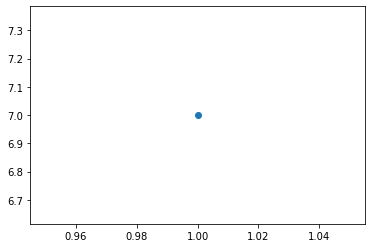

In [28]:
import matplotlib.pyplot as plt
plt.scatter(accuracy,BestQuality)

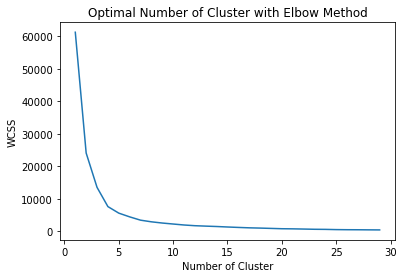

In [35]:
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

X = breast_cancer.iloc[:,[1,2]].values
from sklearn.cluster import KMeans
wcss = []
number_of_cluster_list = range(1, 30)
for i in number_of_cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 60, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(number_of_cluster_list, wcss)
plt.title('Optimal Number of Cluster with Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [36]:
#n_cluster = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print([y_kmeans])

[array([1, 4, 4, 1, 4, 4, 1, 3, 3, 1, 1, 1, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 1, 3, 3, 4, 4, 1, 1, 1, 3, 3, 1, 1, 4, 4, 4,
       3, 4, 4, 1, 4, 4, 3, 4, 3, 1, 4, 4, 4, 3, 4, 4, 4, 3, 1, 3, 3, 3,
       4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 2, 3, 1, 3, 3, 3, 3, 4, 4, 2,
       2, 0, 0, 3, 4, 0, 0, 1, 3, 3, 3, 3, 4, 4, 3, 1, 4, 0, 4, 4, 0, 0,
       0, 4, 3, 3, 1, 0])]


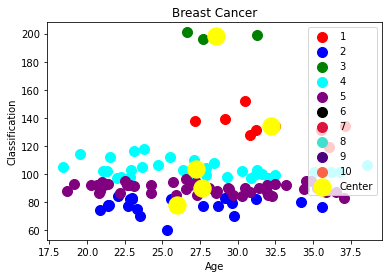

In [37]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = '4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'purple', label = '5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = '6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'crimson', label = '7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'turquoise', label = '8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = 'indigo', label = '9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = 'tomato', label = '10')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Center')
plt.title('Breast Cancer')
plt.xlabel('Age')
plt.ylabel('Classification')
plt.legend()
plt.show()

In [38]:
kmeans = KMeans(n_clusters = i).fit(X_train,y_train)
y_pred = kmeans.predict(X_train)

In [39]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 30)
accuracies = cross_val_score(kmeans, X , y , cv = cv)
accuracy_mean = accuracies.mean()
print(accuracy_mean)
accuracy_std = accuracies.std() * 100
print(accuracy_std)

-150.61019357731257
7306.7760823331455


In [40]:
from sklearn.metrics import confusion_matrix
error_matrix = confusion_matrix(y_train, y_pred)
print(error_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 2 2 1 1 3 1 0 0 4 0 0 0 0 0 0 2 0 0 0 1 3 0 0 0 0 0]
 [1 2 1 0 1 0 0 3 0 1 1 0 1 1 1 1 3 2 0 5 2 1 0 0 1 2 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 